In [1]:
import pandas as pd
import numpy as np


train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

ID = test_data["PassengerId"]

In [2]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

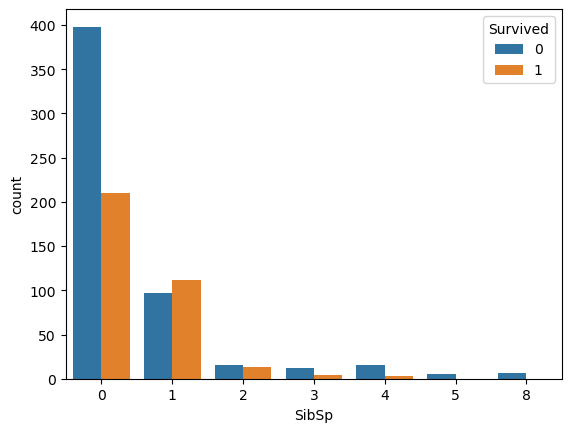

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="SibSp", hue="Survived", data=train_data)
plt.show()

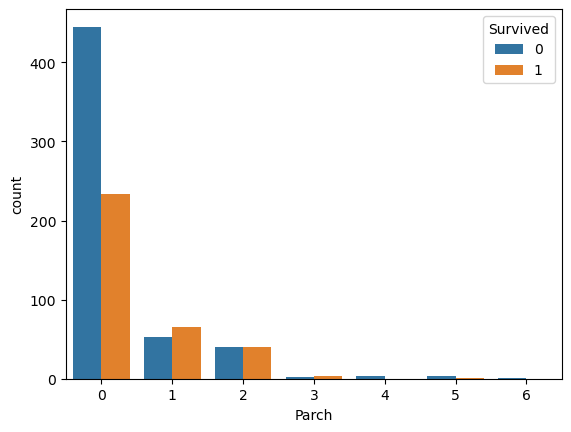

In [4]:
sns.countplot(x="Parch", hue="Survived", data=train_data)
plt.show()

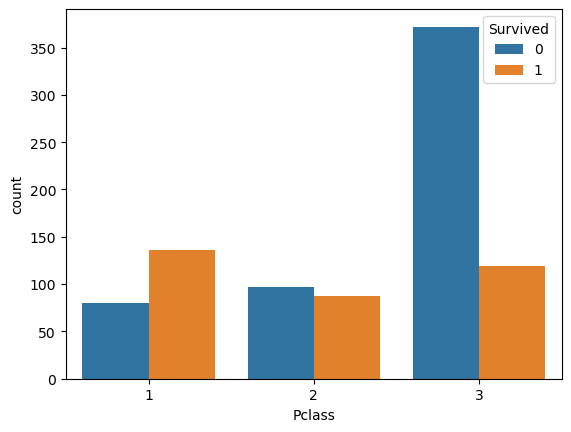

In [5]:
sns.countplot(x="Pclass", hue="Survived", data=train_data)
plt.show()

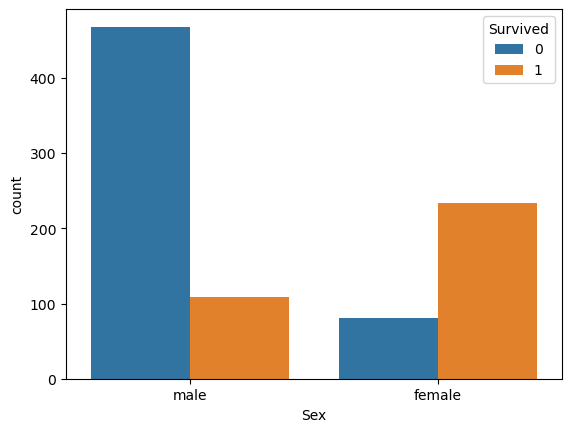

In [6]:
sns.countplot(x="Sex", hue="Survived", data=train_data)
plt.show()

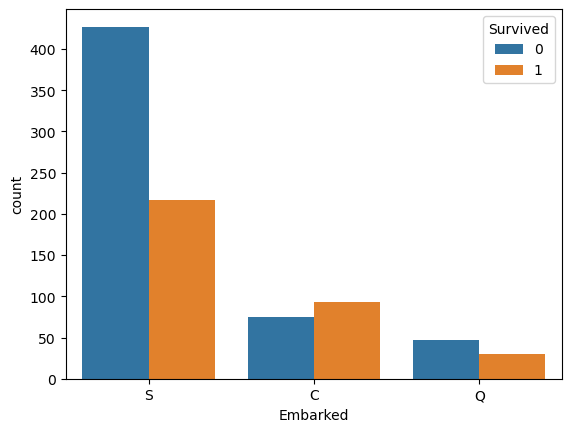

In [7]:
sns.countplot(x="Embarked", hue="Survived", data=train_data)
plt.show()

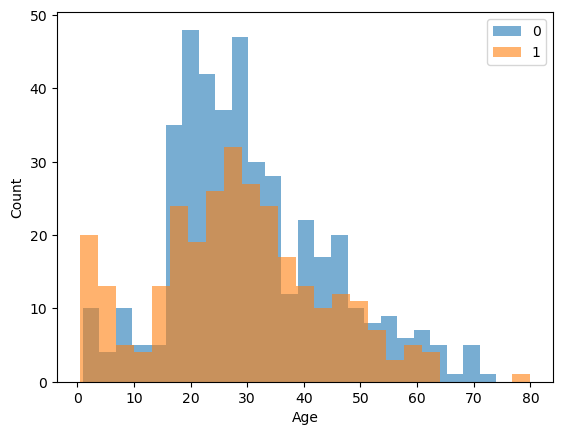

In [8]:
bins = 25
alpha = 0.6

plt.hist(train_data.loc[train_data["Survived"]==0, "Age"].dropna(), bins=bins, alpha=alpha, label="0")
plt.hist(train_data.loc[train_data["Survived"]==1, "Age"].dropna(), bins=bins, alpha=alpha, label="1")

plt.xlabel("Age")
plt.ylabel("Count")


plt.legend()
plt.show()

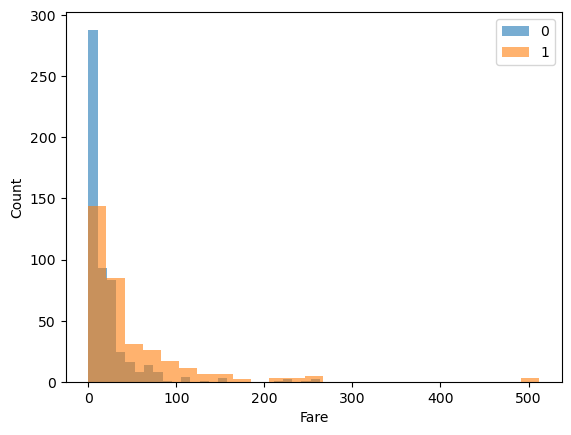

In [9]:
bins = 25
alpha = 0.6

plt.hist(train_data.loc[train_data["Survived"]==0, "Fare"].dropna(), bins=bins, alpha=alpha, label="0")
plt.hist(train_data.loc[train_data["Survived"]==1, "Fare"].dropna(), bins=bins, alpha=alpha, label="1")

plt.xlabel("Fare")
plt.ylabel("Count")

plt.legend()
plt.show()

In [10]:
data = pd.concat([train_data, test_data], sort=False)


data["Sex"].replace(["male", "female"], [0, 1], inplace=True)


data["Embarked"].fillna(("S"), inplace=True)
data["Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2})


data["Age"].fillna(data["Age"].mean(), inplace=True)
data["Fare"].fillna(data["Fare"].mean(), inplace=True)


In [11]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [12]:
data["Family"] = data["Parch"] + data["SibSp"]

data["Family"].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

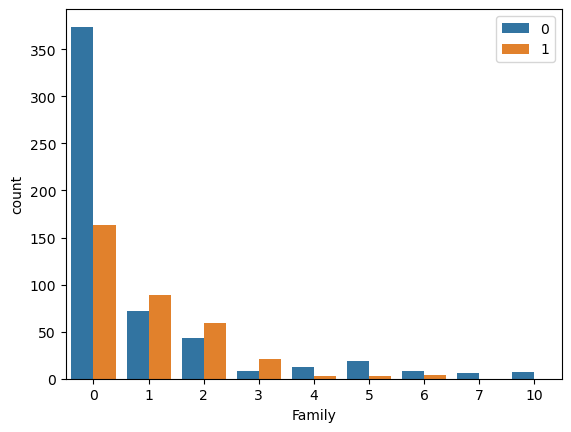

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,1,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,29.881138,0,0,A.5. 3236,8.0500,NaN,0,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,1,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0
416,1308,NaN,3,"Ware, Mr. Frederick",0,29.881138,0,0,359309,8.0500,NaN,0,0


In [13]:
train_data["Family"] = data["Family"][:len(train_data)]
test_data["Family"] = data["Family"][len(train_data):]


sns.countplot(x="Family", data=train_data, hue="Survived")
plt.legend()
plt.show()

data

In [14]:
data.drop(["Name", "PassengerId", "SibSp", "Parch", "Ticket", "Cabin"], axis=1, inplace=True)




train_data = data[:len(train_data)]
test_data = data[len(train_data):]



In [15]:
train_data

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0.0,3,0,22.000000,7.2500,0,1
1,1.0,1,1,38.000000,71.2833,1,1
2,1.0,3,1,26.000000,7.9250,0,0
3,1.0,1,1,35.000000,53.1000,0,1
4,0.0,3,0,35.000000,8.0500,0,0
...,...,...,...,...,...,...,...
886,0.0,2,0,27.000000,13.0000,0,0
887,1.0,1,1,19.000000,30.0000,0,0
888,0.0,3,1,29.881138,23.4500,0,3
889,1.0,1,0,26.000000,30.0000,1,0


In [16]:
test_data

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,NaN,3,0,34.500000,7.8292,2,0
1,NaN,3,1,47.000000,7.0000,0,1
2,NaN,2,0,62.000000,9.6875,2,0
3,NaN,3,0,27.000000,8.6625,0,0
4,NaN,3,1,22.000000,12.2875,0,2
...,...,...,...,...,...,...,...
413,NaN,3,0,29.881138,8.0500,0,0
414,NaN,1,1,39.000000,108.9000,1,0
415,NaN,3,0,38.500000,7.2500,0,0
416,NaN,3,0,29.881138,8.0500,0,0


In [17]:
test_data = test_data.dropna(axis=1)
test_data

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,0,34.500000,7.8292,2,0
1,3,1,47.000000,7.0000,0,1
2,2,0,62.000000,9.6875,2,0
3,3,0,27.000000,8.6625,0,0
4,3,1,22.000000,12.2875,0,2
...,...,...,...,...,...,...
413,3,0,29.881138,8.0500,0,0
414,1,1,39.000000,108.9000,1,0
415,3,0,38.500000,7.2500,0,0
416,3,0,29.881138,8.0500,0,0


In [18]:
from sklearn.model_selection import train_test_split

y = train_data["Survived"]
X = train_data.iloc[:, 1:]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
import lightgbm as lgb

In [22]:
model = lgb.LGBMClassifier(
    boosting_type = 'gbdt',
    objective = 'binary',
    colsample_bytree = 1.0,
    num_leaves = 31,
    max_depth = -1,
    n_estimators = 100,
    random_state = None,
    learning_rate = 0.1,
    reg_alpha = 0.0,
    reg_lambda = 0.0,
    silent = True,
    subsample = 1.0,
    min_child_samples = 20,
    min_child_weight = 0.001,
    min_split_gain = 0.0,
    feature_fraction = 1.0,
    bagging_fraction = 1.0,
    bagging_freq = 0
)

In [23]:
model.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to 

LGBMClassifier(bagging_fraction=1.0, bagging_freq=0, feature_fraction=1.0,
               objective='binary', silent=True)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test, model.predict(X_test)))

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84       105
         1.0       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, model.predict(X_train))

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


0.9480337078651685

In [27]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'num_leaves' : [15, 31, 63],
    'max_depth' : [5, 10, -1],
    'learning_rate' : [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample' : [0.6, 0.8, 1.0],
    'colsample_bytree' : [0.6, 0.8, 1.0],
    'reg_alpha' : [0.0, 0.1, 0.5],
    'reg_lambda' : [0.0, 0.1, 0.5]
}


model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42)


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


best_model = grid_search.best_estimator_
print("Test accuracy:", best_model.score(X_test, y_test))

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits


KeyboardInterrupt: 